# Задание 1

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sys

In [29]:
x = np.array([0.005, 0.01, 0.02, 0.03,  0.04, 0.06, 0.1, 0.2])
y1 = np.array([20, 37, 50, 56, 60, 65, 71, 76])
y2 = np.array([3, 15, 29,36, 40, 44, 48, 51])
y1err = y1 * 0.03
y2err = y2 * 0.03

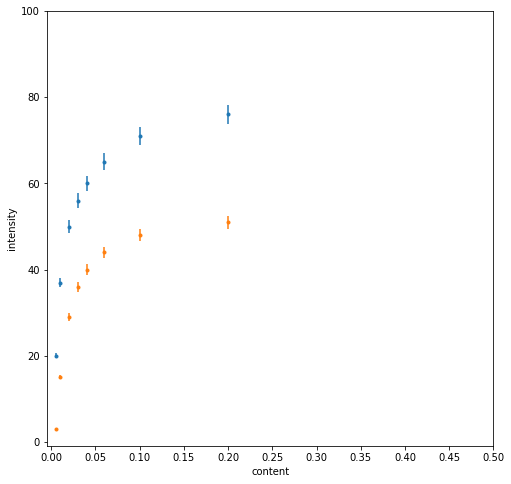

In [30]:
plt.figure(figsize=(8, 8))
plt.errorbar(x, y1, yerr=y1err, fmt='.')
plt.errorbar(x, y2, yerr=y2err, fmt='.')
plt.xlabel('content')
plt.ylabel('intensity')
plt.xticks(np.linspace(0, 0.5, 11))
plt.yticks(np.linspace(0, 100, 6))
plt.show()

Построим линии тренда

In [31]:
def trend_line(t, a, b, c):
    return a + b * np.log(t) + c * np.log(t) ** 2

xp = np.linspace(0.001, 0.5, 100)

(77.875994013819962, -2.8959024107432692, -2.5907154357707789)


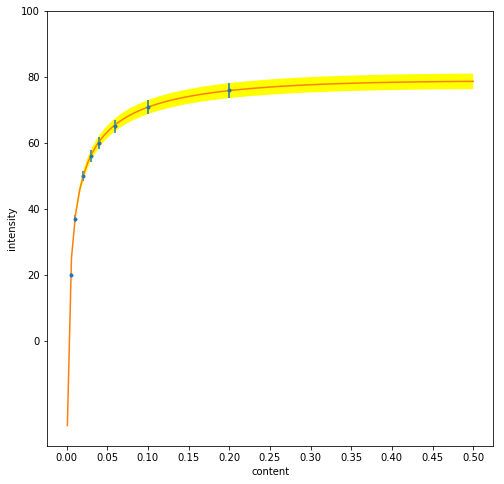

In [34]:
plt.figure(figsize=(8, 8))
a1, b1, c1 = curve_fit(lambda t, a, b, c: trend_line(t, a, b, c),  x,  y1)[0]
print(a1, b1, c1)
yp1 = trend_line(xp, a1, b1, c1)
plt.errorbar(x, y1, yerr=y1err, fmt='.')
plt.plot(xp, yp1)
plt.fill_between(xp, 0.97 * yp1, 1.03 * yp1, facecolor='yellow')
plt.xlabel('content')
plt.ylabel('intensity')
plt.xticks(np.linspace(0, 0.5, 11))
plt.yticks(np.linspace(0, 100, 6))
plt.show()

(49.100142626964981, -5.9727385432681181, -2.8108779648707993)


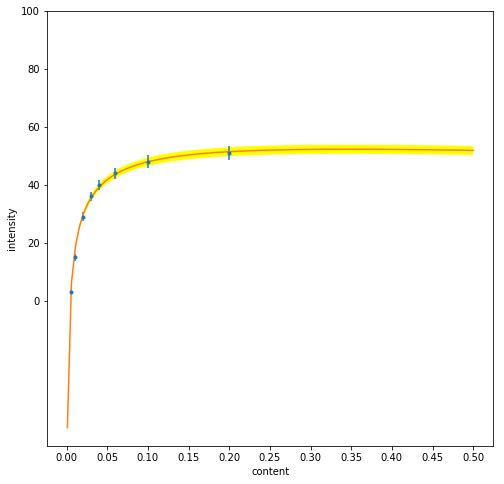

In [35]:
plt.figure(figsize=(8, 8))
a2, b2, c2 = curve_fit(lambda t, a, b, c: trend_line(t, a, b, c),  x,  y2)[0]
print(a2, b2, c2)
yp2 = trend_line(xp, a2, b2, c2)
plt.errorbar(x, y2, yerr=y1err, fmt='.')
plt.plot(xp, yp2)
plt.fill_between(xp, 0.97 * yp2, 1.03 * yp2, facecolor='yellow')
plt.xlabel('content')
plt.ylabel('intensity')
plt.xticks(np.linspace(0, 0.5, 11))
plt.yticks(np.linspace(0, 100, 6))
plt.show()

Считаем значения в заданных точках

In [36]:
print(trend_line(0.3, a1, b1, c1))

77.6072088699


In [37]:
print(trend_line(0.3, a2, b2, c2))

52.2166478029


Считаем среднее отклонение

In [38]:
print(np.mean(np.abs(y1 - trend_line(x, a1, b1, c1))))

0.384897647028


In [39]:
print(np.mean(np.abs(y2 - trend_line(x, a2, b2, c2))))

0.718435139504


# Задание 2

## 2.1

In [40]:
x = np.array([0.01, 0.03, 0.1, 0.3, 1, 4])
y1 = np.array([3.2, 2.3, 1.55, 1, 0.65, 0.5])
y2 = np.array([0.08, 0.075, 0.07, 0.065, 0.06, 0.055])

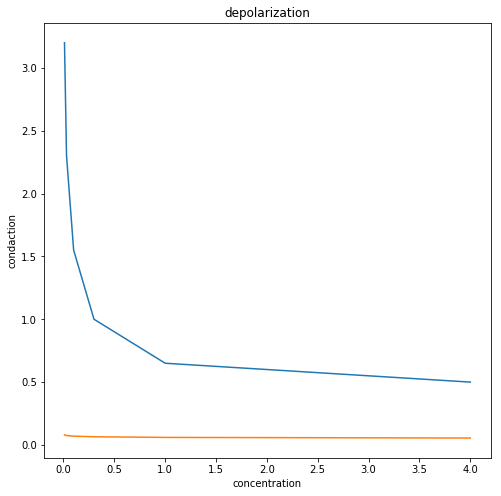

In [41]:
plt.figure(figsize=(8, 8))
plt.title('depolarization')
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('concentration')
plt.ylabel('condaction')
plt.show()

## 2.2

In [42]:
x = np.arange(-150, -29, 10)

In [43]:
y = np.array([[0.090, 0.110, 0.200, 0.350, 0.620, 1.050, 
               1.630, 2.420, 3.200, 3.250, 3.240, np.NaN, np.NaN],
              [np.NaN, 0.100, 0.120, 0.190, 0.280, 0.400, 
               0.780, 1.450, 2.200, 2.380, 2.410, 2.430, np.NaN],
              [np.NaN, np.NaN, 0.120, 0.130, 0.150, 0.220, 
               0.280, 0.400, 0.900, 1.250, 1.300, 1.310, 1.320],
              [np.NaN, np.NaN, np.NaN, 0.065, 0.080, 0.100, 
               0.150, 0.210, 0.400, 0.800, 1.020, 1.100, 1.120],
              [np.NaN, np.NaN, np.NaN, np.NaN, 0.055, 0.070, 
               0.080, 0.110, 0.190, 0.400, 0.600, 0.690, 0.700],
              [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, 0.056, 
               0.070, 0.080, 0.110, 0.160, 0.320, 0.510, 0.550]])

l = [0, 1, 2, 3, 4, 5]
r = [11, 12, 13, 13, 13, 13]

In [44]:
lines = np.array([0.01, 0.03, 0.1, 0.3, 1, 4])

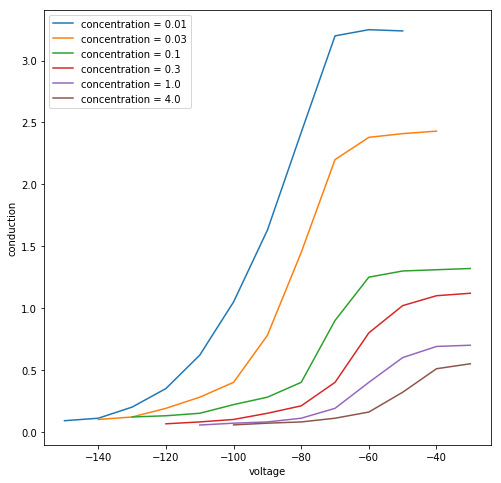

In [45]:
plt.figure(figsize=(8, 8))
plt.xlabel('voltage')
plt.ylabel('conduction')
for i, line in zip(y, lines):
    plt.plot(x, i, label='concentration = ' + str(line))
plt.legend()
plt.show()

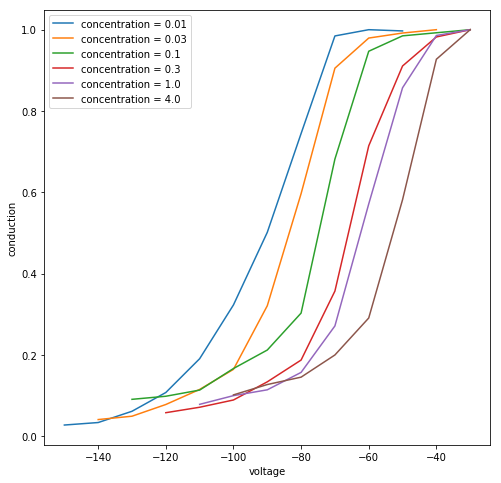

In [46]:
plt.figure(figsize=(8, 8))
plt.xlabel('voltage')
plt.ylabel('conduction')
for i, line in zip(y, lines):
    plt.plot(x, i / np.nanmax(i), 
             label='concentration = ' + str(line))
plt.legend()
plt.show()

In [47]:
answer = np.zeros(6)
for i in range(6):
    for j in range(l[i], r[i]):
        if (y[i][j] * 2 >= np.nanmax(y[i])):
            answer[i] = (x[j] - x[j - 1]) / (y[i][j] - y[i][j - 1]) *\
                        (np.nanmax(y[i]) / 2 - y[i][j - 1]) + x[j - 1]
            break
print(answer)

[-90.0862069  -83.50746269 -74.8        -66.         -62.38095238 -52.8125    ]


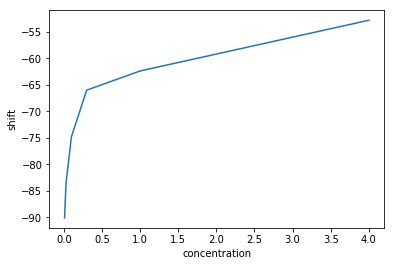

In [48]:
plt.plot(lines, answer)
plt.xlabel('concentration')
plt.ylabel('shift')
plt.show()